<a href="https://colab.research.google.com/github/evangelav/Machine_Learning/blob/main/BINV3100_ML_S4_Exercices_Model_Selection%2C_Cross_Validation%2C_Pre_Processing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BINV3100 ML S4 : Théorie

##Vidéos obligatoires
Nous vous demandons de regarder et de compredre les vidéos suivante:

1.   [SKLEARN : MODEL SELECTION](https://www.youtube.com/watch?v=w_bLGK4Pteo&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=21)
2.   [CROSS VALIDATION](https://www.youtube.com/watch?v=VoyMOVfCSfc&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=22)
3.   [MÉTRIQUE DE RÉGRESSION](https://www.youtube.com/watch?v=_TE9fDgtOaE&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=23)
4.   [PRE-PROCESSING](https://www.youtube.com/watch?v=OGWwzm304Xs&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=24)
5.   [IMPUTER : NETTOYAGE DE DONNÉES](https://www.youtube.com/watch?v=QVEJJNsz-eM&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=26)


A la fin de chaque vidéo, un exercice est proposé. Vous retrouverez ces exercices dans la Partie 1 des exercices de cette semaine

## Les vidéos suivantes sont en bonus:

6.  [PIPELINE AVANCÉE](https://www.youtube.com/watch?v=41mnga4ptso&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=25)

# Partie 1: Exercices relatifs aux Vidéos Machine Learnia

[Lien vers la playlist Machine Learnia](https://www.youtube.com/playlist?list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq)



### Vidéos (21/30): 
[SKLEARN : MODEL SELECTION](https://www.youtube.com/watch?v=w_bLGK4Pteo&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=21)

Vous allez créer un modèle afin de prédir les survivants du naufrage du titanic.

Pour ce faire, 


1.   Ne gardez que les colones 'survived', 'pclass', 'sex', et 'age'
2.   Supprimez les valeurs de type NaN
3.   Dans la colonne sexe, remplacez 'male' et 'female' par 0 et 1
4.   Pour votre dataSet, mettez la colonne 'survived' dans une variable y et les autres colonnes dans une variable X
5.   Créez un Train Set et un Test Set avec le Test Set contenant 20% des données (Vous pouvez utiliser un random_state pour garder les mêmes Set à chaque exécution)
6.   Utilisez un KNeighborsClassifier avec un nombre de voisin égal à 4, pour créer un premier modèle. 
7.   Entrainez-le
8.   Évaluez-le avec un cross-validation avec 5 divisions.
8.   A l'aide de GridSearchCV, trouvez les meilleurs hyper-paramètres n_neighbors (entre 1 et 20), metrics (entre 'euclidian' et 'Manhattan') et weights (entre 'uniform' et 'distance')
9.   Gardez le meilleur modèle obtenu dans une variable best_model
10.  A l'aide de learning_curve, regardez si collecter plus de données pourrait être utile pour améliorer encore ce modèle.




In [41]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

titanic = sns.load_dataset('titanic')


In [42]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)

X = titanic.drop('survived', axis=1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model=  KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
print("train set :",model.score(X_train, y_train))
print("test set :",model.score(X_test, y_test))

train set : 0.8061797752808989
test set : 0.8100558659217877


In [39]:
cross_val_score(KNeighborsClassifier(4), X_train, y_train, cv=5,scoring="accuracy").mean()

0.7373091697035359

In [44]:
param_grid={'n_neighbors': np.arange(1, 20), 'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
print("best score : ",grid.best_score_)

print("best params :",grid.best_params_)

best score :  0.7775743707093822
best params : {'metric': 'manhattan', 'n_neighbors': 11}


In [48]:
meilleur_model = grid.best_estimator_
meilleur_model.score(X_test, y_test)

0.7132867132867133

[ 91 131 172 212 253 293 334 374 415 456]


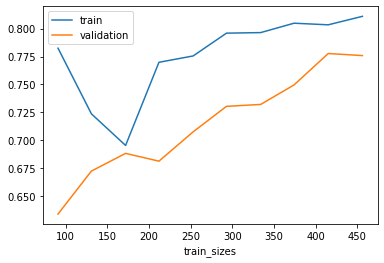

In [50]:
from sklearn.model_selection import learning_curve
%matplotlib inline
import matplotlib.pyplot as plt



N, train_score, val_score=learning_curve(meilleur_model, X_train, y_train, train_sizes=np.linspace(0.2, 1.0, 10), cv=5)


print(N)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## Vidéos (22 et 23 /30) : 

[CROSS VALIDATION](https://www.youtube.com/watch?v=VoyMOVfCSfc&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=22)

[MÉTRIQUE DE RÉGRESSION](https://www.youtube.com/watch?v=_TE9fDgtOaE&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=23)



## Vidéos (24 à 26/30): 

[PRE-PROCESSING](https://www.youtube.com/watch?v=OGWwzm304Xs&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=24)

(Bonus) [PIPELINE AVANCÉE](https://www.youtube.com/watch?v=41mnga4ptso&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=25)

[IMPUTER : NETTOYAGE DE DONNÉES](https://www.youtube.com/watch?v=QVEJJNsz-eM&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=26)

Vous allez tester les différents Scaler sur le dataset des iris.

Pour ce faire
<ol>
<li> Importer le dataset des iris </li>
<li> Créez un Train Set et un Test Set avec le Test Set représentant 25% des données et random_State égal à 4 </li>
<li> Pour chacun des 3 scalers (StandardScaler(), MinMaxScaler et RobustScaler)</li>
<ol type="a">
<li>Créez un pipeline avec un PolynomialFeatures et un SGDClassifier (avec un random_state égal à 5 pour le Classifier) </li>
<li>Cherchez les meilleurs paramètres à l'aide de GridSearchCV testant 2,3,4 pour le dégré du PolynomialFeatures, et "l1", "l2" pour la pénalité du SGDClassifier</li>
<li>Afficher les meilleurs paramètres trouvé, le meilleur score ainsi que le score sur les données de test </li>
</ol>
<li>Sur base des résultats affichés au point 3., Quel scaler choisiriez-vous ? Justifiez !!</li>
</ol>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris

pclass_pipeline = make_pipeline(KNNImputer(n_neighbor=2), OneHotEncoder())
age_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="mean"), RobustScaler())
sex_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="most_frequent"), OneHotEncoder())
transformer = make_column_transformer((pclass_pipeline,X['pclass']),
                                      (age_pipeline,X['age']),
                                      (sex_pipeline,X['sex']))
model = make_pipeline(transformer, SGDClassifier(random_state=4))


Réponse au 4. : 



# Partie 2 : Exercices Machine Learning semaine 4

## Exercice 1 : Survivant du titanic : 

<ol>
<li> Importez le dataset du titanic à l'aide de seaborn </li>
<li> Gardez uniquement les colonnes 'pclass', 'age' et 'sex' comme features et la colonne 'survived' comme target </li>
<li> Créez un Train Set et un Test set avec 20% des données pour le test set et un random_state égal à 4</li>
<li> Créez un preprocesser qui </li>
<ul>
<li> pour la colonne 'pclass' remplace les valeurs manquantes en utilisant un KNNImputer() considérant les 2 plus proches voisins pour ensuite appliquer un OneHotEncoder </li>
<li> pour la colonne 'age' remplace les valeurs manquantes par la moyenne et ensuite applique ensuite un RobustScaler </li>
<li> pour la colonne 'sex' remplace les valeurs manquantes par la valeur la plus fréquente pour ensuite appliquer un OneHotEncoder</li>
</ul>
(Astuce : utilisez make_column_transformer)
<li> Obtenez votre modèle en faisant un pipeline constitué du preprocesser suivi d'un SGDClassifier avec un random_state égal à 4 </li>
<li> Cherchez les meilleurs paramètres du SGDClassifier à l'aide d'un GridSearchCV testant 'l1' et 'l2' comme pénalité. </li>
<li> Afficher le meilleur paramètre, le meilleur score et le score obtenu sur les données de test.  </li>
<li> Essayer d'améliorer le score obtenu en 7., en essayant d'autre encoder, scaler, classifier, ...
</ol>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder,RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

